In [1]:
import duckduckgo_search, time, json

In [2]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [3]:
def find_image(keywords, max_images=200):
    return L(DDGS().images(keywords,max_results=max_images, safesearch='off')).itemgot('image')

In [59]:
zebra= find_image('zebra', max_images=20)

In [62]:
download_url(zebra[0], dest='zebra.jpg')

Path('zebra.jpg')

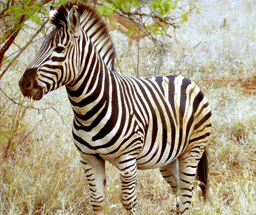

In [63]:
Image.open('zebra.jpg').to_thumb(256,256)

In [64]:
equine = "horse", "donkey", 'zebra'
path = Path('equine')

In [65]:
for b in equine:
    dest = (path/b)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=find_image(f'{b}'))

In [66]:
failed =verify_images(get_image_files(path))

In [67]:
len(failed)

22

In [68]:
failed.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [69]:
equine=DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter=RandomSplitter(seed=42, valid_pct=0.2),
    get_y= parent_label,
    item_tfms=[Resize(128)]
).dataloaders(path)

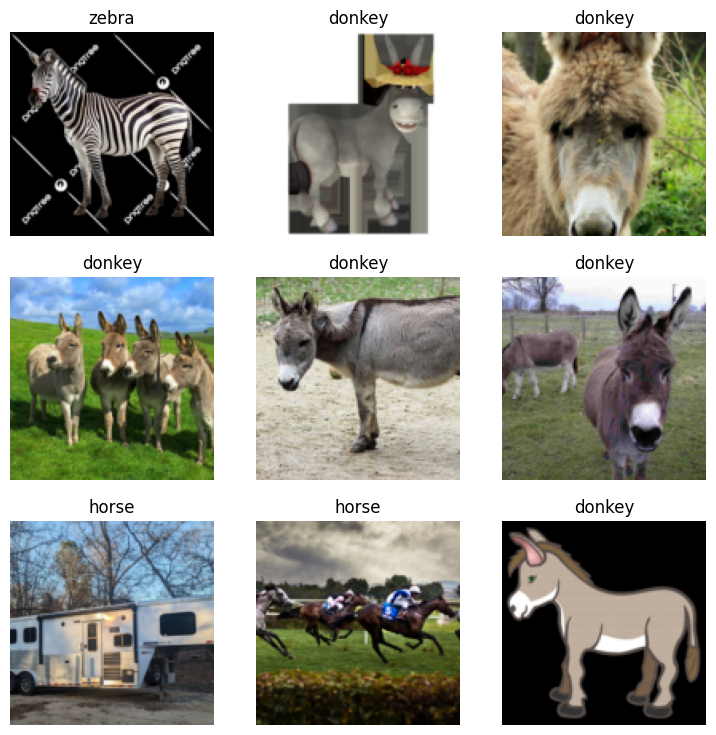

In [70]:
equine.show_batch()

In [71]:
learn=vision_learner(equine,resnet18, metrics=error_rate)

In [72]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.656523,0.699157,0.228261,00:31


C:\Users\piotr\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.612364,0.360966,0.152174,00:31
1,0.416950,0.283643,0.108696,00:32
2,0.324305,0.309246,0.119565,00:31
3,0.263695,0.310994,0.108696,00:31


In [73]:
thing,_,probs= learn.predict(PILImage.create('zebra.jpg'))

In [74]:
probs, thing

(tensor([2.7394e-07, 5.6736e-07, 1.0000e+00]), 'zebra')

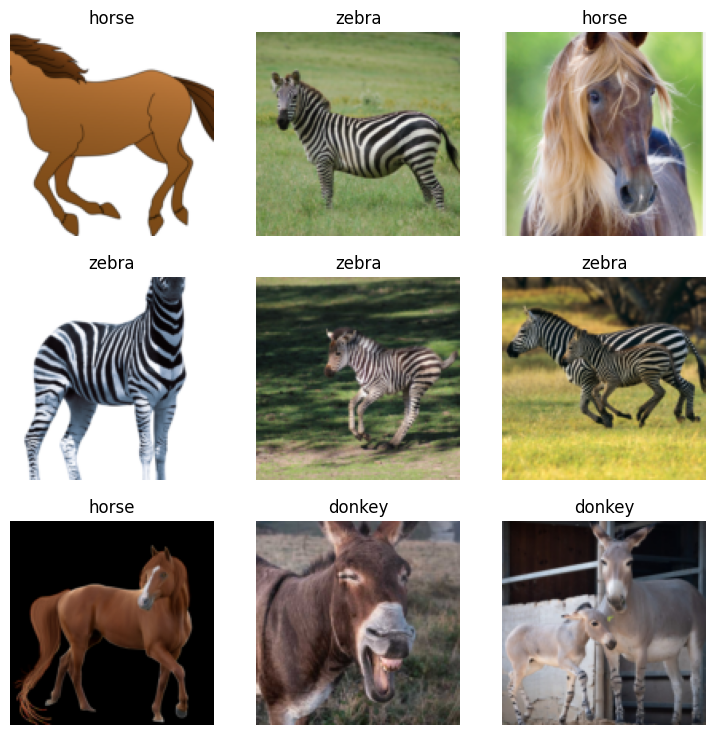

In [75]:
equine.valid.show_batch()

In [76]:
equine= equine.new(item_tfms=[Resize(256, ResizeMethod.Pad, pad_mode='zeros')])

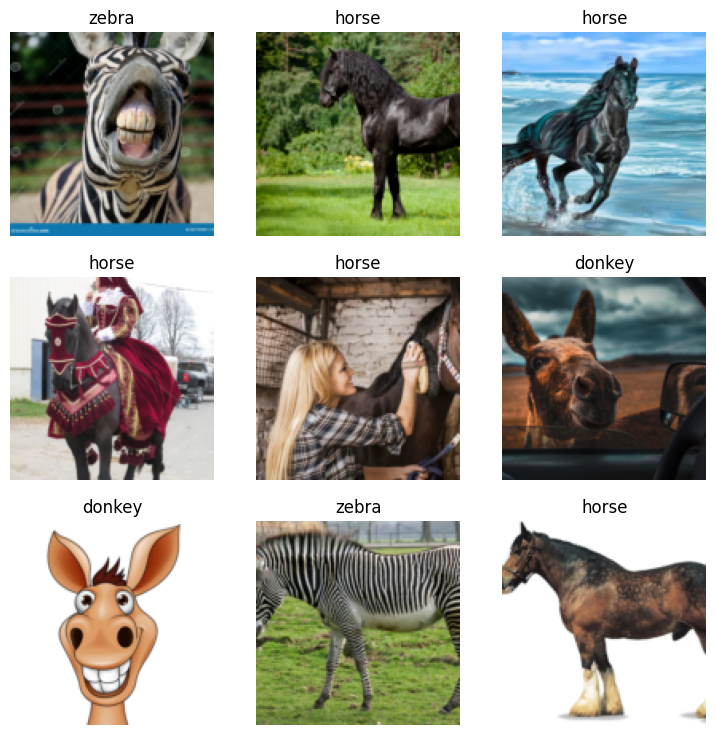

In [77]:
equine.show_batch()

In [78]:
equine = equine.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))

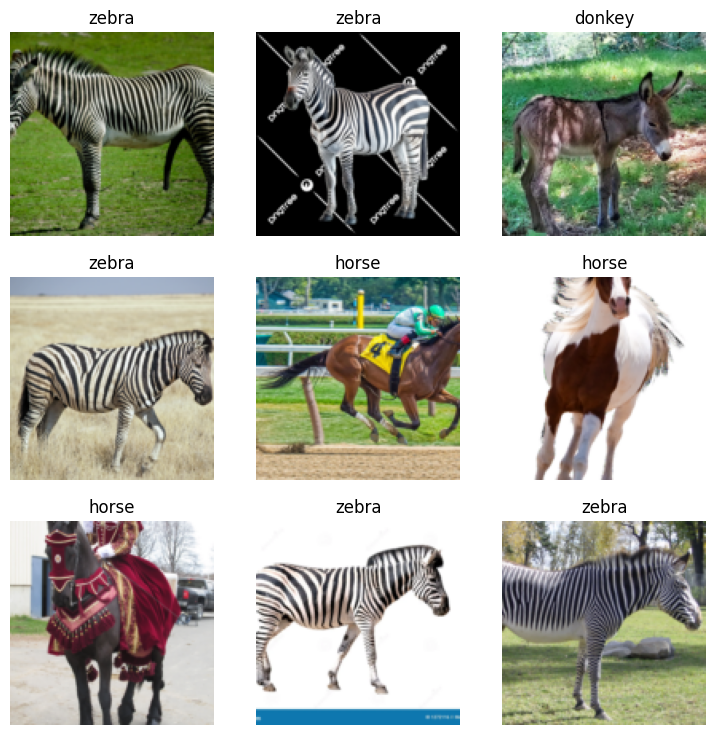

In [79]:
equine.show_batch()